# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [3]:
import pandas as pd

import numpy as np

In [4]:
# Part 1

env = pd.read_csv("/Users/gretchenwang/GitHub/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv")

species = pd.read_csv("/Users/gretchenwang/GitHub/assignment-4/data/Arrigetch_Peaks_Species_Data.csv")

# First few rows: 
env.head()

species.head()

# Dimensions

env.shape # ans: (439,11)

species.shape # ans: (439, 409)

(439, 409)

In [5]:
# Part 2 
species = species.replace(-9999, np.NaN)
env = env.replace(-9999., np.NaN)

In [27]:
# Part 3 
unique_species = set(list(species.loc[:, species.columns!='TURBOVEG_PLOT_NUMBER']))
print(unique_species)

{'Cladonia aberrans', 'Dryopteris fragrans', 'Caloplaca holocarpa', 'Dryas octopetala alaskensis ', 'Poa glauca', 'Rhizocarpon disporum', 'Pertusaria dactylina', 'Thamnolia subuliformis', 'Minuartia rubella', 'Conostomum tetragonum', 'Cladonia gracilis ', 'Peltigera malacea', 'Cetraria islandica reticulata', 'Cystopteris fragilis', 'Anemone richardsonii', 'Cetraria cucullata', 'Catoscopium nigritum', 'Cetraria tilesii', 'Dactylina ramulosa', 'Peltigera scabrosa', 'Carex microchaeta', 'Bryum pseudotriquetrum', 'Lecidea rubiformis', 'Lycopodium annotinum pungens ', 'Ochrolechia upsaliensis', 'Cladonia decorticata', 'Rinodina roscida', 'Cladonia pocillum', 'Cynodontium polycarpum', 'Saxifraga davurica grandipetala ', 'Dermatocarpon rufescens', 'Andreaeobryum macrosporum', 'Anastrophyllum minutum', 'Abietinella abietina', 'Boschniakia rossica', 'Didymodon acutus ditrichoides', 'Pedicularis kanei kanei', 'Lycopodium alpinum ', 'Campylium halleri', 'Umbilicaria cinerorufa', 'Stereocaulon pas

In [7]:
# Part 4

env_num = env.select_dtypes(exclude=['object'])

env_num.loc[:, env_num.columns != 'TURBOVEG_PLOT_NUMBER'].describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


In [8]:
# Part 5 

Merged_df = pd.merge(env, species, on = 'TURBOVEG_PLOT_NUMBER')

Merged_df.head()

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,...,Umbilicaria vellea,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090.0,45.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920.0,315.0,NaN,0,0,0,0,0,...,0.5,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940.0,270.0,NaN,0,0,0,0,0,...,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950.0,225.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935.0,270.0,NaN,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [9]:
# Part 6

sum(Merged_df.isnull().any(axis=1))

422

In [20]:
# Part 7

species_count = species.loc[:, species.columns!='TURBOVEG_PLOT_NUMBER']

sorter = species_count.astype(bool).sum(axis=0)

sorter.sort_values(ascending=False) 
# the species that appears in most plots is the Cetraria islandica

Cetraria islandica             229
Cetraria cucullata             224
Salix reticulata reticulata    209
Dryas octopetala octopetala    204
Carex scirpoidea               197
                              ... 
Hypogymnia austerodes            1
Hypogymnia physodes              1
Kiaeria starkei                  1
Lecanora coilocarpa              1
Pyrola secunda                   1
Length: 408, dtype: int64

In [33]:
# Part 8 This is the cell that can only be run once 


species_count = species.loc[:, species.columns!='TURBOVEG_PLOT_NUMBER'] 
# ^ repeated from above but I though it would be clearer to read if I did it again here


totals = species_count.sum(axis=1)

species['Totals'] = totals 

species.head()

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans,Totals
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,79.5
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,101.0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,135.5
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,84.0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,84.5


Part 9: 

The description of the dataframe in general seems to be correct, but I'm not sure if the description of the 'species name' columns is correct, as it claims the data values include 'r' and '+' but the dataset itself only has 0 and numbers below 1 for their value. I would consider changing the description of the 'species name' columns, as it seems like the researchers didn't use 'r' and '+'. 

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

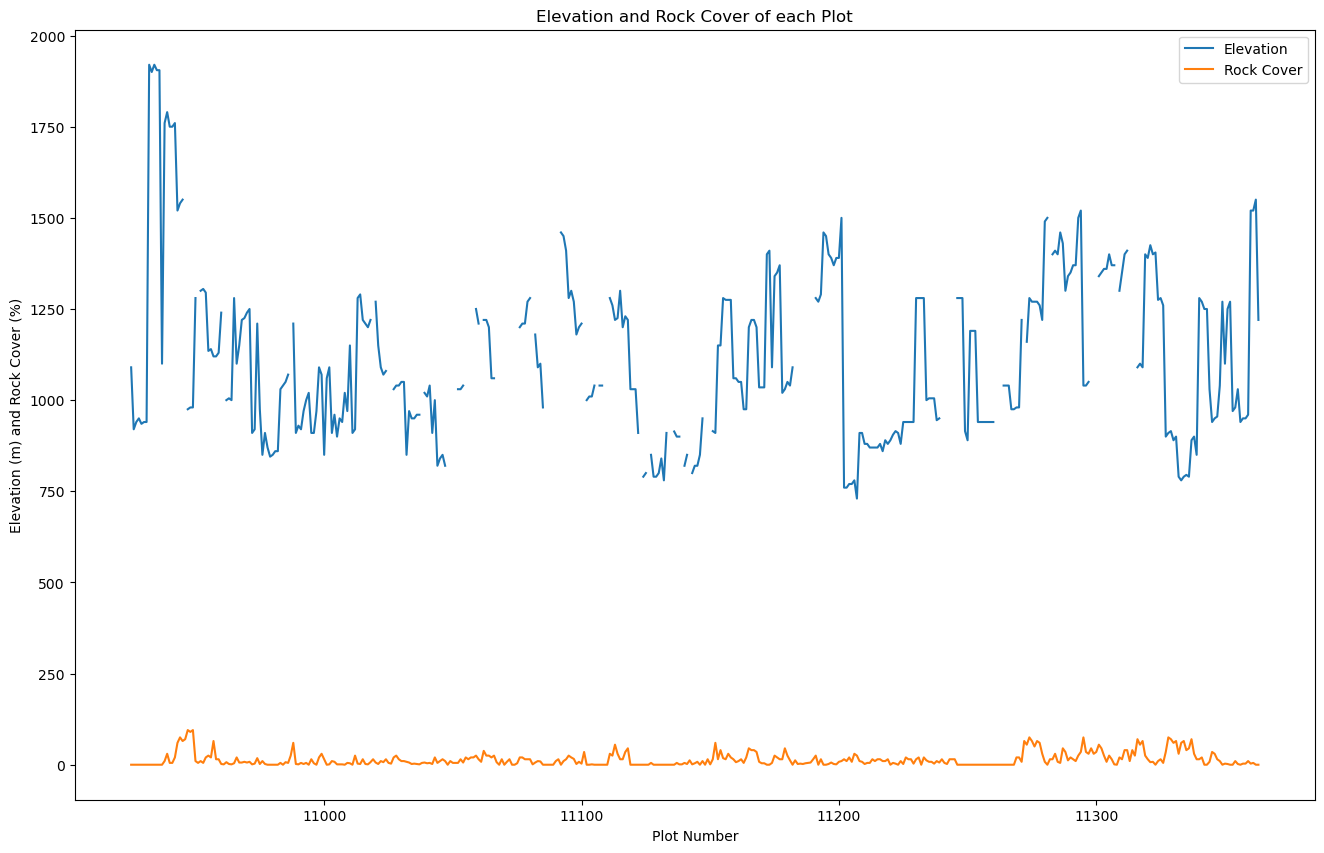

In [30]:
# Part 1 
figure, ax = plt.subplots(1, figsize=(16,10))
ax.plot(env['TURBOVEG_PLOT_NUMBER'], env['ELEVATION'], label = 'Elevation') 
ax.plot(env['TURBOVEG_PLOT_NUMBER'], env['COVER_ROCK'], label = 'Rock Cover')
ax.set_xlabel('Plot Number')
ax.set_ylabel('Elevation (m) and Rock Cover (%)')
ax.set_title('Elevation and Rock Cover of each Plot')
ax.legend()

plt.show()

# There appears a positive relationship between the two but it looks weak

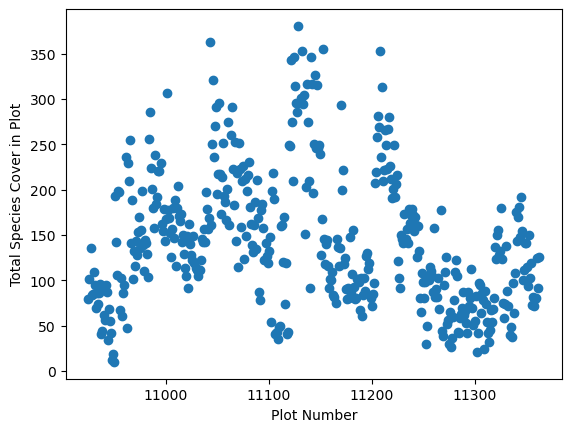

In [34]:
# Part 2 
figure, ax = plt.subplots()
ax.scatter(species['TURBOVEG_PLOT_NUMBER'], species['Totals'])
ax.set_xlabel('Plot Number')
ax.set_ylabel('Total Species Cover in Plot')

plt.show()

In [53]:
species['Totals'].describe()

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: Totals, dtype: float64

In [37]:
# Part 3

envcom = env.loc[env['PLANT_COMMUNITY_NAME'].eq('Caricetum scirpoideae-rupestris') | env['PLANT_COMMUNITY_NAME'].eq('Pedicularo kanei-Caricetum glacialis') | env['PLANT_COMMUNITY_NAME'].eq('Saxifrago tricuspidatae-Artemisietum alaskanae'), :]

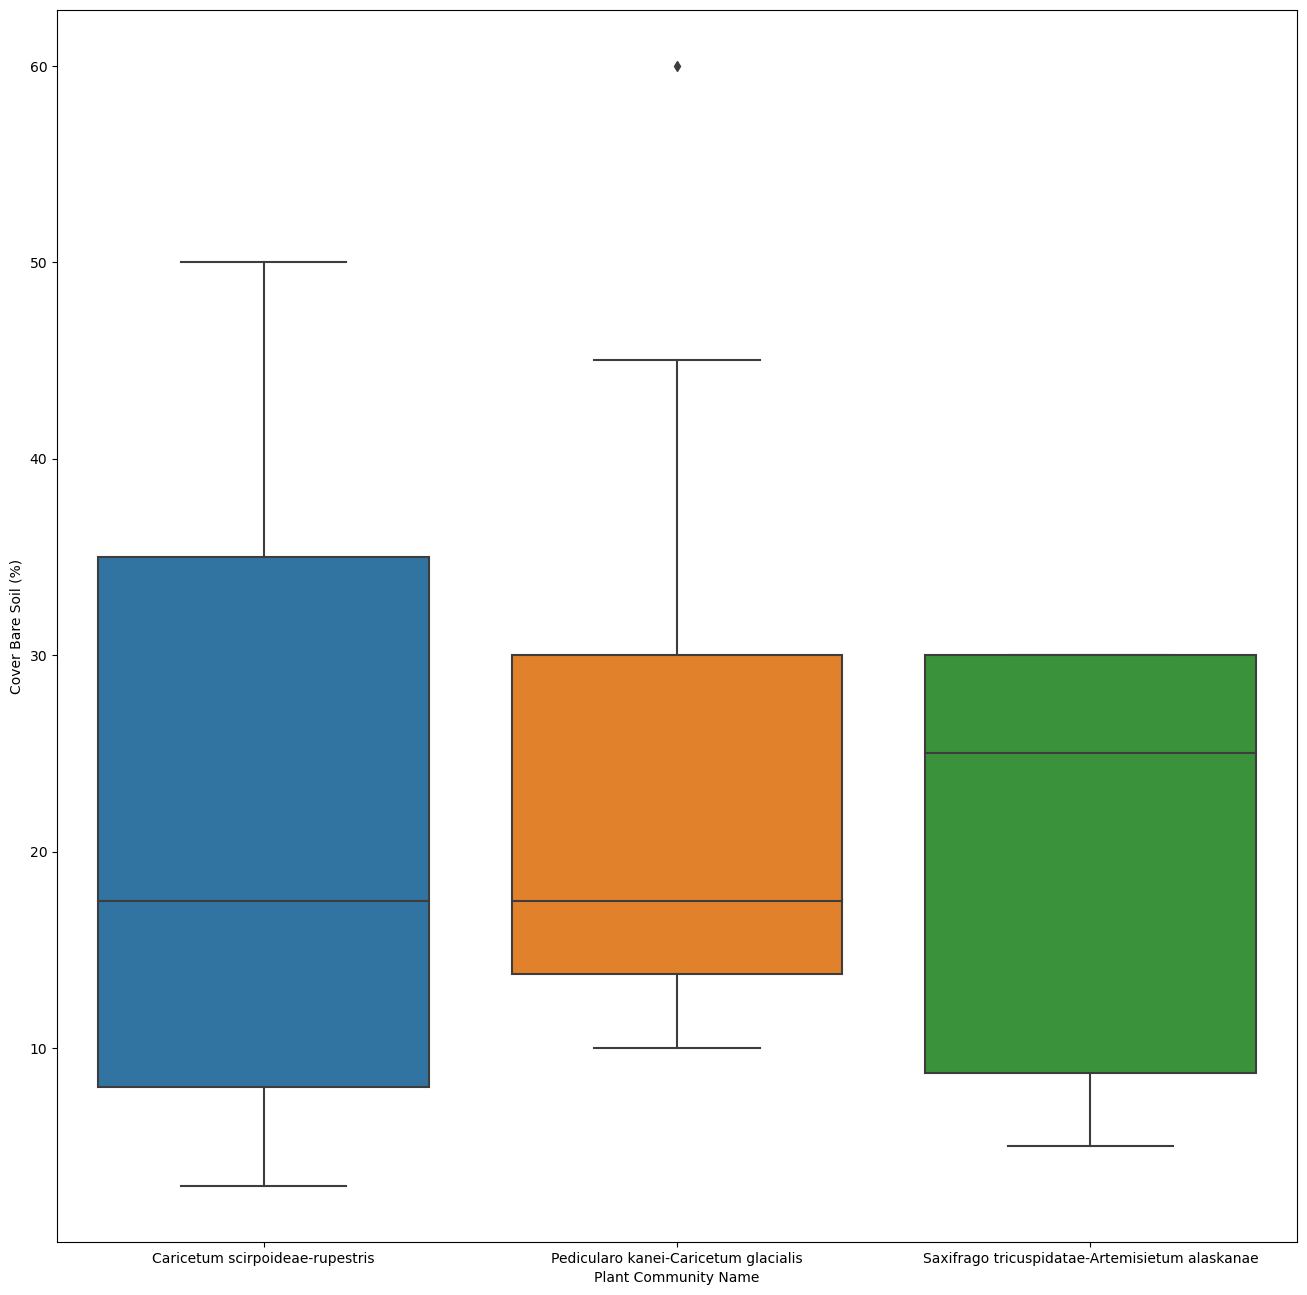

In [38]:
# Part 4

fig, ax = plt.subplots(1, figsize=(16, 16))
sns.boxplot(data=envcom, x='PLANT_COMMUNITY_NAME', y='COVER_BARE_SOIL')
ax.set_xlabel('Plant Community Name')
ax.set_ylabel('Cover Bare Soil (%)')
plt.show()


Analysis (Part 4 continued): Caricetum scirpoidae-rupestris has a wider range in bare soil coverage percentages than the other two and also the widest interquartile range, indicating a more even distribution than the others. Pedicularo kanei-Caricetum glacialis has a wider range than Saxifrago tricuspidatae-Artemisietum alaskanae but a more concentrated distribution, with a smaller interquartile range than the other. Saxifrago tricuspidatae-Artemisietum alaskanae has the lowest maximum percent but the highest median valiue, and Caricetum scirpoidae-rupestris and Pedicularo kanei-Caricetum glacialis seem to have the same median value. Saxifrago tricuspidatae-Artemisietum appears to be skewed negatively (concentrated in higher values). Pedicularo kanei-Caricetum glacialis appears to be skewed positively. Caricetum scirpoideae-rupestris's distribution seems more normal than the others but likely still skewed positively.